# Linearly seperable data

Linear SVM:

In [1]:

import numpy as np
import GenerateData
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [21]:
def plot_svm_map ( axes, svm, X, y, resolution, title ):
    """
    Utility to plot the classification map of an SVM
    highlighting the support vectors.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_predictions = svm.predict(grid_points)
    
    # Define color maps for the decision regions
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Two class colors
    cmap_bold = ['blue', 'red']

    axes.contourf(xx, yy, grid_predictions.reshape(xx.shape), alpha=0.8, cmap='coolwarm')
    
    scatter = axes.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k')
    
    axes.set_title(title)
    axes.scatter(X[svm.support_,0], X[svm.support_,1],
                 facecolors='none', edgecolors='k', s=140, label='SV')
    axes.legend(loc='upper left')

In [ ]:
def geometric_margin ( X, y, weights, bias ):
    """
    Calculate the geometric margin for a given dataset and linear decision boundary. 

    # Arguments
        X: an array of sample data
        y: vector of ground truth labels for the samples
        weights: a vector of weights 
        bias: scalar intercept value

    # Returns:
        g: the geometric margin
    """
    # Transfor the ground truth y using convention {0,1} to the ym using convention {-1,1}
    ym = np.array([-1, 1])[y.astype(int)] #[y.astype(int)] consists of {0,1}, so it can access the elements in array [-1, 1]
    
    # The geometric margin for a whole dataset is the minimum of the geometric margins of all samples in the set
    gg = ym * (X @ weights + bias) / np.linalg.norm(weights)
    return np.min(gg)

1.436031872537627


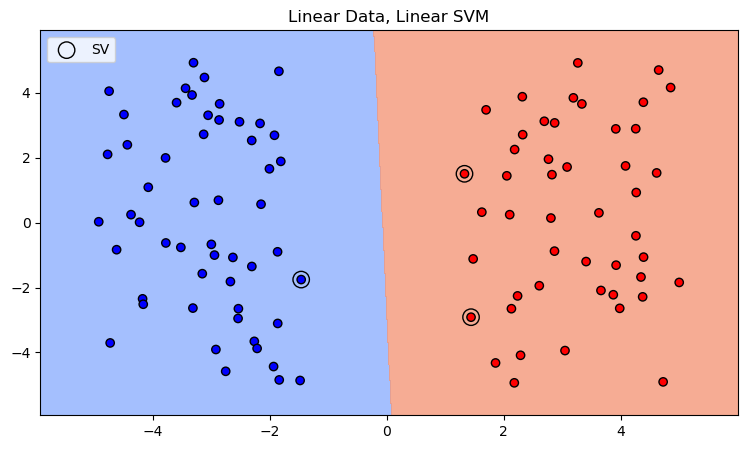

In [22]:
LIMITS=(-5, 5)
NUM_SAMPLES = 100
RESOLUTION = 2000
COST = 1
GAMMA = 0.5

fig = plt.figure(figsize=(9, 5))
ax = fig.subplots()

# generate some data
X_linear, y_linear = GenerateData.generate_margined_binary_data ( NUM_SAMPLES, 2, LIMITS)

svm_linear = SVC(kernel='linear', C=COST)
svm_linear.fit(X_linear, y_linear)

plot_svm_map(ax, svm_linear, X_linear, y_linear, RESOLUTION, title='Linear Data, Linear SVM')

# Optimal weights without bias term after applying SVM
weights = svm_linear.coef_[0,:] # For binary classification, svm.coef_ = [[w1, w2, ..., wn]]

bias = svm_linear.intercept_[0] # For binary classification, svm.intercept_ = [b]

margin_svm = geometric_margin(X_linear, y_linear, weights, bias)

print(margin_svm)

RBF SVM:

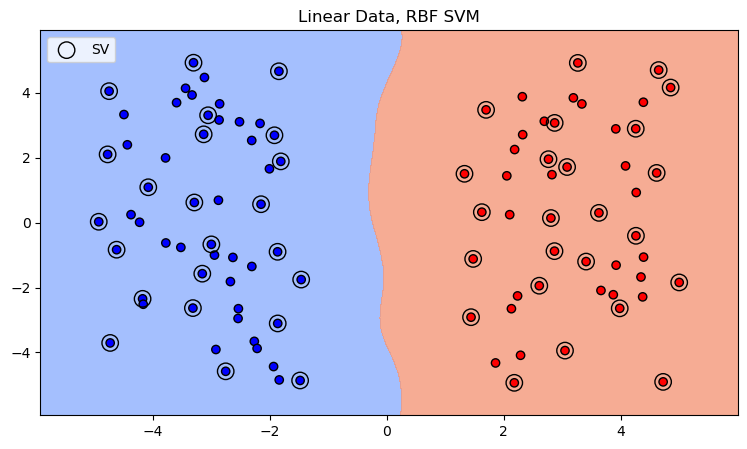

In [23]:
svm_rbf = SVC(kernel='rbf', C=COST, gamma=GAMMA)
svm_rbf.fit(X_linear, y_linear)

fig = plt.figure(figsize=(9, 5))
ax = fig.subplots()

plot_svm_map(ax, svm_rbf, X_linear, y_linear, RESOLUTION, 'Linear Data, RBF SVM')

# Non-linear data
Linear SVM:

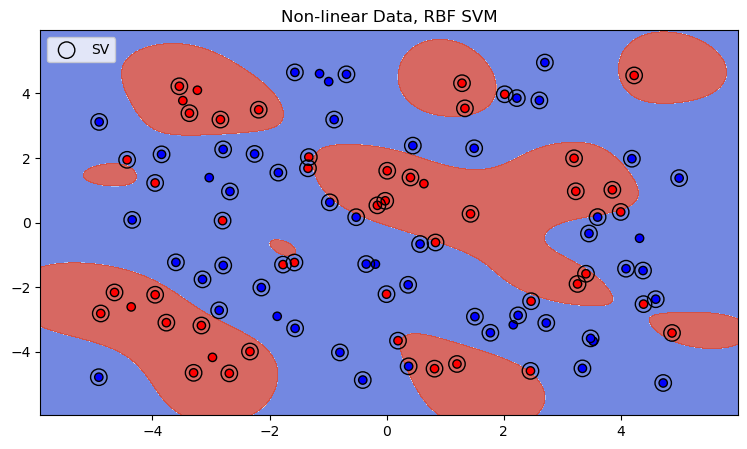

In [26]:
X_non_linear, y_non_linear = GenerateData.generate_binary_nonlinear_2d(NUM_SAMPLES, LIMITS)

svm_linear2 = SVC(kernel='rbf', C=COST, gamma=GAMMA)
svm_linear2.fit(X_non_linear, y_non_linear)

fig = plt.figure(figsize=(9, 5))
ax = fig.subplots()

plot_svm_map(ax, svm_linear2, X_non_linear, y_non_linear, RESOLUTION, title='Non-linear Data, RBF SVM')

# Using SVM to classify MNIST dataset (hand-written digits)

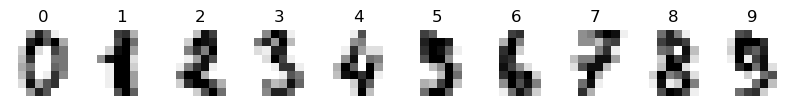

In [2]:
# Load the digits dataset
digits = datasets.load_digits()

# Features and labels
X = digits.data  # Each row is a flattened 8x8 grayscale image
y = digits.target  # Labels: digits 0-9

# Display some example images
_, axes = plt.subplots(1, 10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(label)
plt.show()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# 'stratify=y' ensures that the class proportions in your training and test sets reflect those in the original dataset

# Standardize the data
scaler = StandardScaler()
# Compute the mean and sd based on training data, then standardise the training data
X_train = scaler.fit_transform(X_train)
# Standardise the testing data using the mean and sd gotten above
X_test = scaler.transform(X_test)

In [8]:
# Hyperparameter tuning:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

COST_tuned = grid_search.best_params_['C']
gamma_tuned = grid_search.best_params_['gamma']


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [9]:
# Create an SVM model with an RBF kernel
svm = SVC(kernel='rbf', C=COST_tuned, gamma=gamma_tuned)  # Adjust C and gamma for performance
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      0.98      0.96        55
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        55
           4       0.95      0.98      0.96        54
           5       1.00      0.98      0.99        55
           6       0.98      1.00      0.99        54
           7       0.96      1.00      0.98        54
           8       1.00      0.92      0.96        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



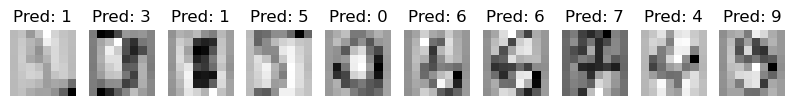

In [6]:
# Visualize predictions
_, axes = plt.subplots(1, 10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)  # Reshape to 8x8
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {prediction}")
plt.show()